In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [20]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-10-23 20:46:32.012224: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-10-23 20:46:34.979568: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 20:46:34.982375: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-10-23 20:46:35.379462: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-23 20:46:35.381976: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13271, 512, 512, 1) (13271, 512, 512, 1) (3495, 512, 512, 1) (3495, 512, 512, 1)


In [10]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


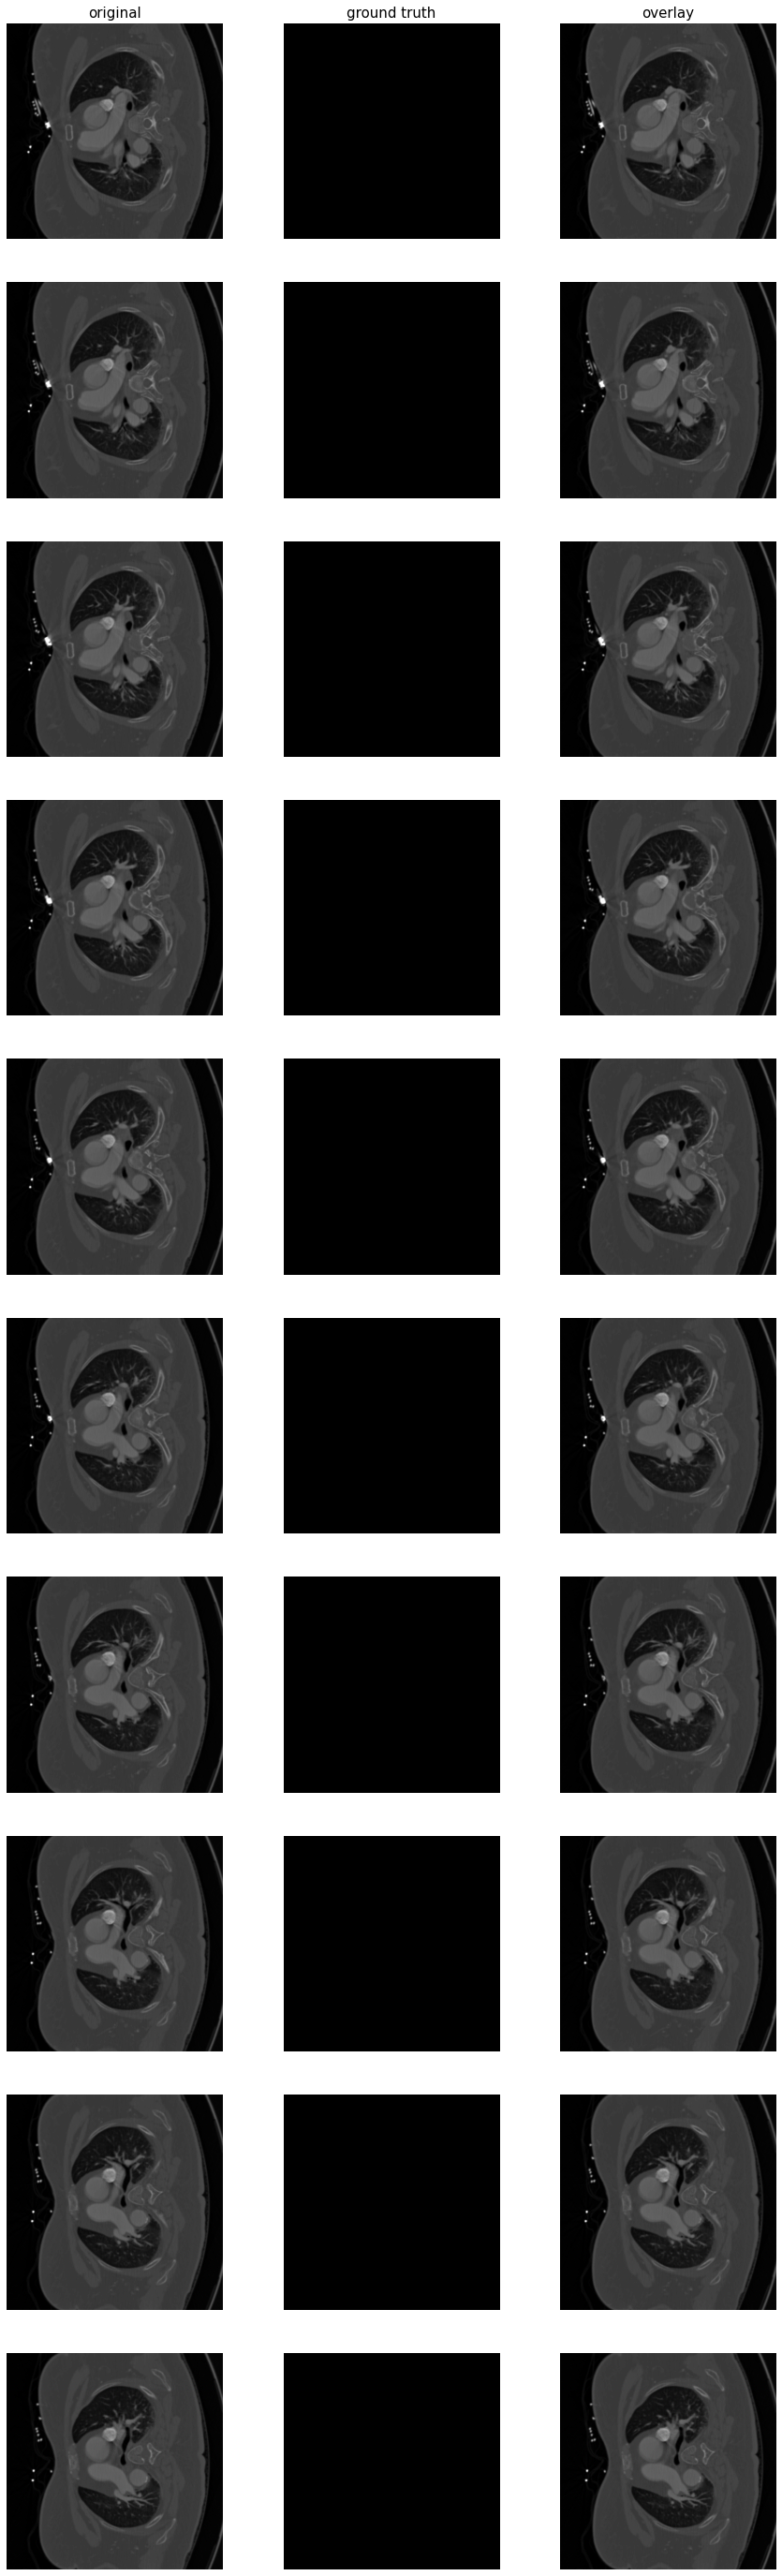

In [11]:
from keras_unet.utils import plot_imgs
plot_imgs(org_imgs=X_train_set, mask_imgs=y_train_set, nm_img_to_plot=10, figsize=5)

In [12]:
train_gen = C.Helper.augment_1(X_train_set, y_train_set)

In [13]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-10-23 20:49:09.016005: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-23 20:49:09.018550: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-23 20:49:09.028308: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-10-23 20:49:09.031285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-10-23 20:49:09.033757: I tensorflow/core

In [14]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2023-10-23 20:49:09.983370: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-10-23 20:49:10.004743: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-10-23 20:49:11.228145: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-10-23 20:49:12.199909: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-10-23 20:49:13.337800: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-10-23 20:49:13.337825: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-10-23 20:49:13.338282: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-23 20:49:14.399363: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-10-23 20:49:15.463120: I tensorflow/stream_exec

15/15 [==============================] - 252s 13s/step - loss: 12.2264 - iou: 0.1209 - iou_thresholded: 0.1474 - val_loss: 0.0059 - val_iou: 0.0033 - val_iou_thresholded: 0.0266
Epoch 2/200
15/15 [==============================] - 101s 7s/step - loss: 0.0054 - iou: 0.0021 - iou_thresholded: 0.0055 - val_loss: 4.8543e-04 - val_iou: 0.0120 - val_iou_thresholded: 0.4479
Epoch 3/200
15/15 [==============================] - 101s 7s/step - loss: 9.3626e-04 - iou: 0.0016 - iou_thresholded: 0.0276 - val_loss: 2.4837e-04 - val_iou: 0.0095 - val_iou_thresholded: 0.8251
Epoch 4/200
15/15 [==============================] - 101s 7s/step - loss: 5.0178e-04 - iou: 0.0026 - iou_thresholded: 0.2090 - val_loss: 4.2728e-04 - val_iou: 0.0013 - val_iou_thresholded: 0.8251
Epoch 5/200
15/15 [==============================] - 99s 7s/step - loss: 3.4020e-04 - iou: 0.0018 - iou_thresholded: 0.2112 - val_loss: 1.5538e-04 - val_iou: 0.0098 - val_iou_thresholded: 0.8251
Epoch 6/200
15/15 [========================

Epoch 43/200
15/15 [==============================] - 100s 7s/step - loss: 8.4444e-05 - iou: 0.0297 - iou_thresholded: 0.0866 - val_loss: 1.1126e-04 - val_iou: 0.0636 - val_iou_thresholded: 0.8251
Epoch 44/200
15/15 [==============================] - 101s 7s/step - loss: 7.5153e-05 - iou: 0.0271 - iou_thresholded: 0.1452 - val_loss: 1.2083e-04 - val_iou: 0.0604 - val_iou_thresholded: 0.8251
Epoch 45/200
15/15 [==============================] - 101s 7s/step - loss: 7.0299e-05 - iou: 0.0343 - iou_thresholded: 0.1503 - val_loss: 1.1830e-04 - val_iou: 0.0778 - val_iou_thresholded: 0.8251
Epoch 46/200
15/15 [==============================] - 101s 7s/step - loss: 6.7192e-05 - iou: 0.0441 - iou_thresholded: 0.0850 - val_loss: 1.1296e-04 - val_iou: 0.0994 - val_iou_thresholded: 0.8251
Epoch 47/200
15/15 [==============================] - 100s 7s/step - loss: 6.0362e-05 - iou: 0.0464 - iou_thresholded: 0.0817 - val_loss: 1.1734e-04 - val_iou: 0.1213 - val_iou_thresholded: 0.8251
Epoch 48/200
15

Epoch 85/200
15/15 [==============================] - 101s 7s/step - loss: 2.6964e-05 - iou: 0.3054 - iou_thresholded: 0.3886 - val_loss: 1.6373e-04 - val_iou: 0.2244 - val_iou_thresholded: 0.6645
Epoch 86/200
15/15 [==============================] - 101s 7s/step - loss: 2.9073e-05 - iou: 0.2897 - iou_thresholded: 0.4618 - val_loss: 1.5294e-04 - val_iou: 0.3588 - val_iou_thresholded: 0.7851
Epoch 87/200
15/15 [==============================] - 101s 7s/step - loss: 2.5047e-05 - iou: 0.3120 - iou_thresholded: 0.4196 - val_loss: 1.5435e-04 - val_iou: 0.3542 - val_iou_thresholded: 0.7489
Epoch 88/200
15/15 [==============================] - 101s 7s/step - loss: 2.7032e-05 - iou: 0.3109 - iou_thresholded: 0.4639 - val_loss: 1.5229e-04 - val_iou: 0.2369 - val_iou_thresholded: 0.6747
Epoch 89/200
15/15 [==============================] - 101s 7s/step - loss: 2.5395e-05 - iou: 0.3120 - iou_thresholded: 0.4508 - val_loss: 1.6242e-04 - val_iou: 0.3440 - val_iou_thresholded: 0.7119
Epoch 90/200
15

15/15 [==============================] - 99s 7s/step - loss: 2.0749e-05 - iou: 0.3596 - iou_thresholded: 0.4599 - val_loss: 1.9107e-04 - val_iou: 0.3479 - val_iou_thresholded: 0.6261
Epoch 127/200
15/15 [==============================] - 100s 7s/step - loss: 1.6257e-05 - iou: 0.4714 - iou_thresholded: 0.5839 - val_loss: 2.2565e-04 - val_iou: 0.4450 - val_iou_thresholded: 0.6925
Epoch 128/200
15/15 [==============================] - 101s 7s/step - loss: 1.6653e-05 - iou: 0.4984 - iou_thresholded: 0.6162 - val_loss: 2.2403e-04 - val_iou: 0.3821 - val_iou_thresholded: 0.6496
Epoch 129/200
15/15 [==============================] - 100s 7s/step - loss: 1.7391e-05 - iou: 0.4733 - iou_thresholded: 0.7020 - val_loss: 2.1833e-04 - val_iou: 0.4108 - val_iou_thresholded: 0.6717
Epoch 130/200
15/15 [==============================] - 101s 7s/step - loss: 1.6015e-05 - iou: 0.4186 - iou_thresholded: 0.6076 - val_loss: 2.1997e-04 - val_iou: 0.3585 - val_iou_thresholded: 0.6346
Epoch 131/200
15/15 [====

15/15 [==============================] - 101s 7s/step - loss: 1.0951e-05 - iou: 0.6165 - iou_thresholded: 0.7536 - val_loss: 3.7364e-04 - val_iou: 0.6441 - val_iou_thresholded: 0.7537
Epoch 168/200
15/15 [==============================] - 101s 7s/step - loss: 1.0557e-05 - iou: 0.5918 - iou_thresholded: 0.7582 - val_loss: 3.7973e-04 - val_iou: 0.5320 - val_iou_thresholded: 0.6799
Epoch 169/200
15/15 [==============================] - 101s 7s/step - loss: 1.1382e-05 - iou: 0.6382 - iou_thresholded: 0.7345 - val_loss: 3.5333e-04 - val_iou: 0.4101 - val_iou_thresholded: 0.6052
Epoch 170/200
15/15 [==============================] - 101s 7s/step - loss: 1.6660e-05 - iou: 0.4937 - iou_thresholded: 0.5934 - val_loss: 2.9462e-04 - val_iou: 0.2891 - val_iou_thresholded: 0.4759
Epoch 171/200
15/15 [==============================] - 101s 7s/step - loss: 1.9056e-05 - iou: 0.5322 - iou_thresholded: 0.6618 - val_loss: 2.4366e-04 - val_iou: 0.2606 - val_iou_thresholded: 0.5072
Epoch 172/200
15/15 [===

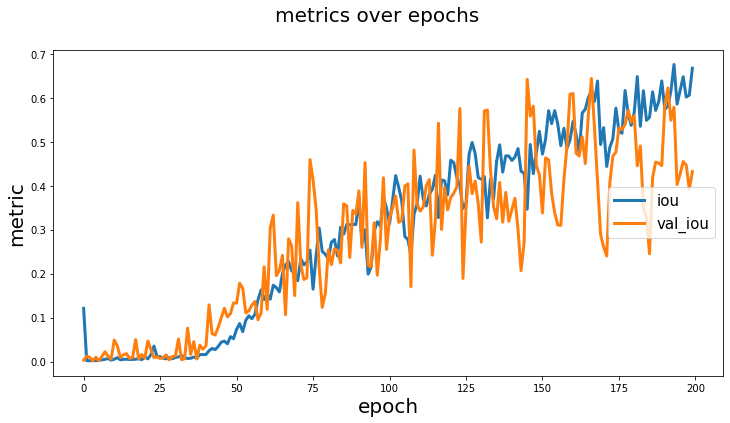

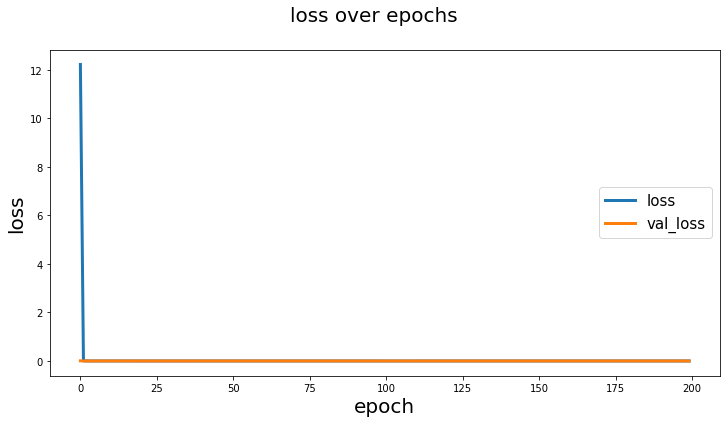

In [15]:
C.Helper.visualize_graph(history)

In [16]:
y_pred = C.Helper.prediction(X_test, model)

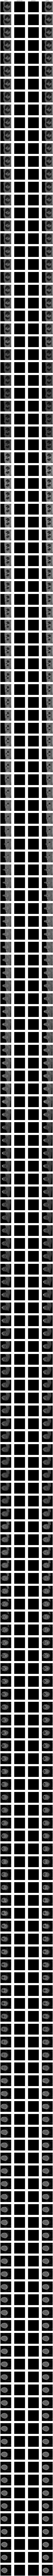

In [22]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [18]:
C.Helper.evaluate(X_test, y_test, model)

110/110 [==============================] - 24s 218ms/step - loss: 3.7505e-04 - iou: 0.3868 - iou_thresholded: 0.5844
